In [17]:
#Assignment 3: Final Project (PART-1)
#Name: Uday Bhaskar Valapadasu
#ID: 11696364

In [18]:
# Installing XBoost and SHAP Package in our Jupyter Notebook.
!pip install xgboost shap

In [19]:
# Importing the necessary packages
import xgboost as xgb
import shap
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
# Repeating the first 2 steps from assignment - 2
# Step 1: Imported the diabetes_df.csv from assignment-1
# Step 2: Using Pandas creating dataaframme frrom diabetes_df.csv and call it assignment2_df

assignment2_df = pd.read_csv("diabetes_df.csv")
assignment2_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,150,33.6,0.627,50,1
1,1,85,66,29,150,26.6,0.351,31,0
2,8,183,64,0,150,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,150,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,150,30.1,0.349,47,1


In [21]:
# Picked the split-1 (80-20) data split from the results of step-4 from assignment-2

#features array
X = assignment2_df.drop(['Target'], axis=1)
#target array 
y = assignment2_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Lets creeate a default model using the command “model = xgb.XGClassifier()”. 
#You use your preferred for variable name in place of “model”.

# Default XGBoost classifier model
fp_xgb = xgb.XGBClassifier()

# Fit the model to the training data
fp_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fp_xgb.predict(X_test)
y_pred_proba_default = fp_xgb.predict_proba(X_test)[:, 1]

In [23]:
# Optimizing the XGboost model using hyperparametrization
fp_xgb_opt = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1, random_state=42)
fp_xgb_opt.fit(X_train, y_train)

# Predict using optimized model
y_pred_opt = fp_xgb_opt.predict(X_test)
y_pred_proba_opt = fp_xgb_opt.predict_proba(X_test)[:, 1]

In [24]:
# Calculate accuracies without and with optimization.

#This signifies accuracy without optimizing
accuracy_default = accuracy_score(y_test, y_pred_default)
# This signifies accuracy with optimizition
accuracy_opt = accuracy_score(y_test, y_pred_opt)

# Generate ROC curves for default and optimization.
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_opt)
roc_auc_default = auc(fpr_default, tpr_default)
roc_auc_opt = auc(fpr_opt, tpr_opt)

# Calculate p-value for model acceptance
n = len(y_test)
k = sum(y_pred_opt == y_test)
p_value = stats.binomtest(k, n, p=0.5, alternative='greater').pvalue


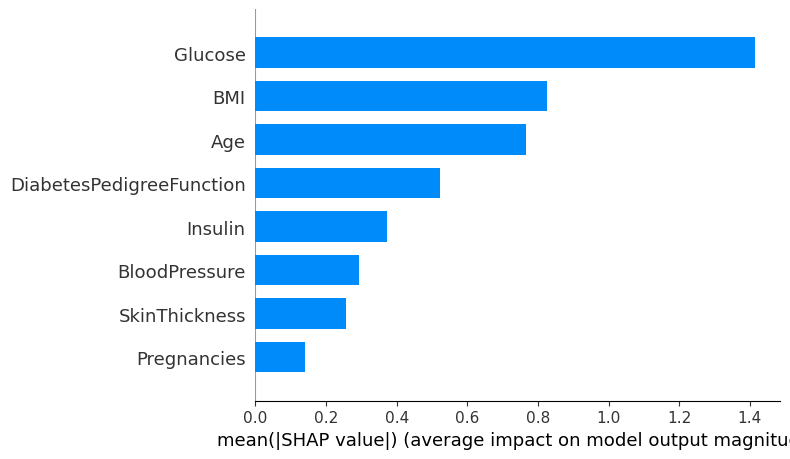

In [25]:
# Generating SHAP plots for the visualizing the model.
explainer = shap.TreeExplainer(fp_xgb_opt)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot using Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.savefig("shap_feature_importance.png")
plt.close()

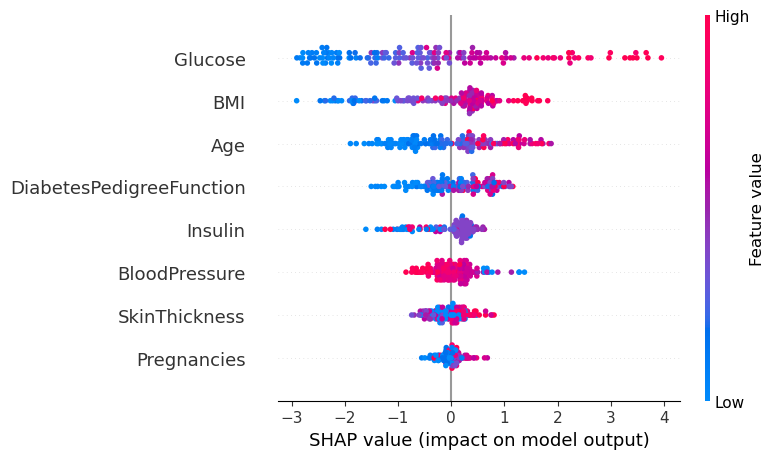

In [26]:
# SHAP summary plot using Dot Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.savefig("shap_summary_plot.png")
plt.close()

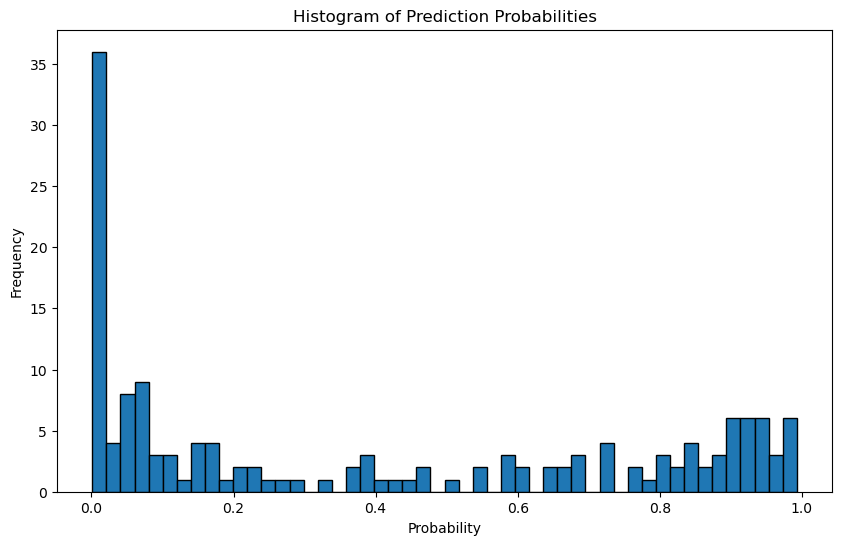

In [27]:
# Generate histogram of prediction probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_opt, bins=50, edgecolor='black')
plt.title("Histogram of Prediction Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()
plt.savefig("prediction_probabilities_histogram.png")
plt.close()

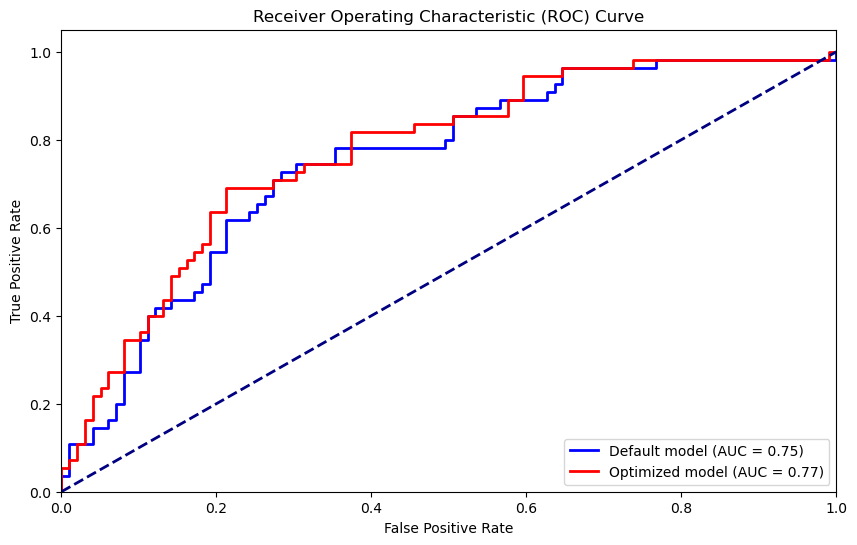

In [28]:
# Generate ROC curve plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_default, tpr_default, color='blue', lw=2, label=f'Default model (AUC = {roc_auc_default:.2f})')
plt.plot(fpr_opt, tpr_opt, color='red', lw=2, label=f'Optimized model (AUC = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig("roc_curve.png")
plt.close()

In [29]:
# Print results
print(f"Default Model Accuracy: {accuracy_default:.4f}")
print(f"Optimized Model Accuracy: {accuracy_opt:.4f}")
print(f"Default Model AUC: {roc_auc_default:.4f}")
print(f"Optimized Model AUC: {roc_auc_opt:.4f}")
print(f"P-value: {p_value:.4f}")

Default Model Accuracy: 0.7078
Optimized Model Accuracy: 0.7273
Default Model AUC: 0.7519
Optimized Model AUC: 0.7728
P-value: 0.0000
